In [1]:
import pandas as pd
import numpy as np
import json

# Consistency - Columns

1. "question_text" - Text of the question
2. "q_type" - "binary" for binary question, "continuous" for cont and "mc" for multiple choice
3. "answer" - Yes/No for binary questions, number for continuous and option for mc
4. "answer_choices" - Contains options for the answer if type is not binary.
5. "year" - Year in which the question was resolved
6. "tags" - All tags by the platform for domains of the question as a list
7. "description" - Further description of the question

# Metaculus

In [2]:
metaculusQuestions = pd.read_csv('data/Metaculus_Questions.csv')
metaculusCategories = pd.read_csv('data/Metaculus_Categories.csv')

In [3]:
metaculusQuestions

,Unnamed: 0,question,qtype,answer,resolve_time,active_state,q_id
0,0,Will advanced LIGO announce discovery of gravi...,{'type': 'binary'},0.0,2016-02-01T03:34:00Z,RESOLVED,1
1,1,Will SpaceX successfully land a Falcon 9 rocke...,{'type': 'binary'},0.0,2016-02-28T07:59:00Z,RESOLVED,2
2,2,Will we confirm evidence for megastructures or...,{'type': 'binary'},0.0,2016-03-01T20:00:00Z,RESOLVED,4
3,3,Will Lockheed Martin and Skunkworks announce a...,{'type': 'binary'},0.0,2019-04-23T00:34:00Z,RESOLVED,5
4,4,The FAA to soon open the door to commercial us...,{'type': 'binary'},0.0,2016-06-16T17:40:04.092000Z,RESOLVED,6
...,...,...,...,...,...,...,...
4087,4087,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-08T20:40:00Z,RESOLVED,19613
4088,4088,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-08T22:30:00Z,RESOLVED,19616
4089,4089,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-07T22:34:00Z,RESOLVED,19623
4090,4090,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-08T00:03:00Z,RESOLVED,19626


In [4]:
metaculusCategories

,Unnamed: 0,q_id,description,categories
0,0,1,NaN,"['category--research-impact', 'category--scien..."
1,1,2,NaN,"['category--app-success', 'category--technolog..."
2,2,4,NaN,"['category--scientific-discoveries', 'phys-sci..."
3,3,5,NaN,"['category--research-impact', 'category--techn..."
4,4,6,NaN,"['category--research-impact', 'category--techn..."
...,...,...,...,...
4087,4087,19613,NaN,NaN
4088,4088,19616,NaN,NaN
4089,4089,19623,NaN,NaN
4090,4090,19626,NaN,NaN


Can notice some rows don't have categories or descriptions

Now, let's merge both the tables

In [5]:
combinedMetaculus = metaculusQuestions.merge(metaculusCategories, on='q_id', how='left')
combinedMetaculus

,Unnamed: 0_x,question,qtype,answer,resolve_time,active_state,q_id,Unnamed: 0_y,description,categories
0,0,Will advanced LIGO announce discovery of gravi...,{'type': 'binary'},0.0,2016-02-01T03:34:00Z,RESOLVED,1,0,NaN,"['category--research-impact', 'category--scien..."
1,1,Will SpaceX successfully land a Falcon 9 rocke...,{'type': 'binary'},0.0,2016-02-28T07:59:00Z,RESOLVED,2,1,NaN,"['category--app-success', 'category--technolog..."
2,2,Will we confirm evidence for megastructures or...,{'type': 'binary'},0.0,2016-03-01T20:00:00Z,RESOLVED,4,2,NaN,"['category--scientific-discoveries', 'phys-sci..."
3,3,Will Lockheed Martin and Skunkworks announce a...,{'type': 'binary'},0.0,2019-04-23T00:34:00Z,RESOLVED,5,3,NaN,"['category--research-impact', 'category--techn..."
4,4,The FAA to soon open the door to commercial us...,{'type': 'binary'},0.0,2016-06-16T17:40:04.092000Z,RESOLVED,6,4,NaN,"['category--research-impact', 'category--techn..."
...,...,...,...,...,...,...,...,...,...,...
4087,4087,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-08T20:40:00Z,RESOLVED,19613,4087,NaN,NaN
4088,4088,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-08T22:30:00Z,RESOLVED,19616,4088,NaN,NaN
4089,4089,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-07T22:34:00Z,RESOLVED,19623,4089,NaN,NaN
4090,4090,Which team will win the 2023/2024 UEFA Champio...,{'type': 'binary'},0.0,2023-11-08T00:03:00Z,RESOLVED,19626,4090,NaN,NaN


Analysis on question type 

In [6]:
import ast
types = [ast.literal_eval(combinedMetaculus['qtype'][i]) for i in range(len(combinedMetaculus['qtype']))]

In [7]:
types2 = []
empty = []
for i in range(len(types)):
    try: 
        types2.append(types[i]['type'])
    except:
        types2.append(None)
        empty.append(i)

In [8]:
# Some entries don't have q_type dictionary
len(empty)

98

In [9]:
answersInEmpty = [combinedMetaculus['answer'][i] for i in empty]

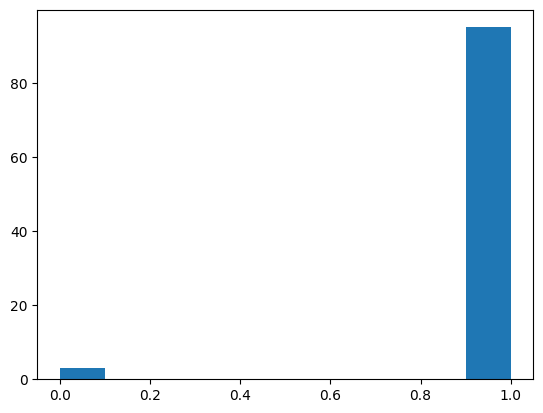

In [10]:
import matplotlib.pyplot as plt
plt.hist(answersInEmpty)
plt.show()

Rows that have empty qtype only have answers 1 or 0 so we are setting them to be binary questions.

In [11]:
for i in empty:
    combinedMetaculus['qtype'][i] = "{'type': 'binary'}"

C:\Users\vetur\AppData\Local\Temp\ipykernel_179232\4265548377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinedMetaculus['qtype'][i] = "{'type': 'binary'}"


In [12]:
import ast
newTypes = [ast.literal_eval(combinedMetaculus['qtype'][i]) for i in range(len(combinedMetaculus['qtype']))]

In [13]:
newEmpty = []
for i in range(len(newTypes)):
    try: 
        newTypes[i]['type']
    except:
        newEmpty.append(i)

In [14]:
newEmpty

[]

As we can see, we have removed all rows that have empty qtype in metaculus data

Now, let's make the metaculus dataset in the final form to be used for prediction

In [15]:
metaculus = pd.DataFrame()

In [16]:
metaculus['QuestionText'] = combinedMetaculus['question']
metaculus['QType'] = [ast.literal_eval(x)['type'] for x in list(combinedMetaculus['qtype'])]
metaculusAnswers = []
for i in range(len(combinedMetaculus['answer'])):
    typeDict = ast.literal_eval(combinedMetaculus['qtype'][i])
    if typeDict['type'] == 'binary':
        if combinedMetaculus['answer'][i] == 0:
            metaculusAnswers.append('no')
        else:
            metaculusAnswers.append('yes')
    else:
        metaculusAnswers.append(combinedMetaculus['answer'][i])
        
metaculus['Answer'] = metaculusAnswers

answertype = []
for i in range(len(combinedMetaculus['qtype'])):
    typeDict = ast.literal_eval(combinedMetaculus['qtype'][i])
    if typeDict['type'] == 'binary':
        answertype.append(None)
    else:
        answertype.append(combinedMetaculus['qtype'][i])

metaculus['AnswerChoices'] = answertype


metaculus['Year'] = [combinedMetaculus['resolve_time'][i][:4] for i in range(len(combinedMetaculus['resolve_time']))]
res = []
for i in range(len(combinedMetaculus['categories'])):
    if combinedMetaculus['categories'][i] is np.nan:
        res.append(None)
        continue
    cats = []
    for cat in ast.literal_eval(combinedMetaculus['categories'][i]):
        catSplit = cat.split('--')
        if catSplit[0] == 'category':
            cats.append(catSplit[1].replace('-', ' '))
        else:
            cats.append(cat.replace('-', ' '))
    res.append(cats)
    
metaculus['Tags'] = res
metaculus['Description'] = combinedMetaculus['description']
metaculus

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,Will advanced LIGO announce discovery of gravi...,binary,no,None,2016,"[research impact, scientific discoveries, tech...",NaN
1,Will SpaceX successfully land a Falcon 9 rocke...,binary,no,None,2016,"[app success, technological advances, phys sci...",NaN
2,Will we confirm evidence for megastructures or...,binary,no,None,2016,"[scientific discoveries, phys sci astro and c...",NaN
3,Will Lockheed Martin and Skunkworks announce a...,binary,no,None,2019,"[research impact, technological advances, phys...",NaN
4,The FAA to soon open the door to commercial us...,binary,no,None,2016,"[research impact, technological advances, comp...",NaN
...,...,...,...,...,...,...,...
4087,Which team will win the 2023/2024 UEFA Champio...,binary,no,None,2023,None,NaN
4088,Which team will win the 2023/2024 UEFA Champio...,binary,no,None,2023,None,NaN
4089,Which team will win the 2023/2024 UEFA Champio...,binary,no,None,2023,None,NaN
4090,Which team will win the 2023/2024 UEFA Champio...,binary,no,None,2023,None,NaN


## Autocast

In [17]:
questions = json.load(open('data/autocast_questions.json', encoding="utf8")) # Download from GitHub
qid_to_question = {q['id']: q for q in questions}


In [18]:
resolved_autocast = {
    'question': [],
    'qtype': [],
    'choices': [],
    'answer': [],
    'close_time': [],
    'tags': [],
    'background': []
}
cnt = 0
for q in questions:
    if q['status'] == 'Resolved':
        cnt += 1
        for key in resolved_autocast:
            resolved_autocast[key].append(q[key])

autocast_data = pd.DataFrame(resolved_autocast)
autocast_data

,question,qtype,choices,answer,close_time,tags,background
0,What will the end-of-day closing value for the...,mc,"[Less than 6.30, Between 6.30 and 6.35, inclus...",D,2016-01-01 17:00:01+00:00,"[Finance, Economic Indicators]",Outcome will be determined by the end-of-day c...
1,How many seats will the Justice and Developmen...,mc,"[A majority, A plurality, Not a plurality]",A,2015-11-01 22:00:20+00:00,"[Elections and Referenda, Non-US Politics]",The Justice and Development Party (AKP) failed...
2,Will there be an initial public offering on ei...,t/f,"[yes, no]",yes,2015-11-30 14:00:15+00:00,[Finance],China suspended initial public offerings (IPOs...
3,Will the Export-Import Bank of the United Stat...,t/f,"[yes, no]",yes,2015-12-04 14:00:25+00:00,"[Economic Policy, US Politics, US Policy]",The Export-Import Bank's authorization expired...
4,Will a trilateral meeting take place between C...,t/f,"[yes, no]",no,2015-12-31 23:00:11+00:00,[Foreign Policy],"A trilateral meeting of leaders from China, Ja..."
...,...,...,...,...,...,...,...
3743,Will the 7-day moving average of current confi...,t/f,"[yes, no]",no,2022-05-20 16:00:00+00:00,"[Novel Coronavirus (Covid-19), Tournament -- R...","Nationwide, new COVID-19 hospitalizations have..."
3744,Will Russia officially declare war on Ukraine ...,t/f,"[yes, no]",no,2022-05-08 20:59:00+00:00,"[Short-fuse, Geopolitics – Armed Conflict, Ukr...","On February 24, 2022, Russian President Vladim..."
3745,Will the Metaculus question about Russian troo...,t/f,"[yes, no]",yes,2022-05-31 15:54:00+00:00,"[Metaculus Itself, Geopolitics – Armed Conflic...","A previous Metaculus question asked ""at least ..."
3746,[Short Fuse] How much money will be awarded to...,num,"{'max': 100000000, 'min': -100000000, 'deriv_r...",0.54175,2022-05-31 04:00:00+00:00,"[Short-fuse, Social issues – Crime and Violence]","From the wikipedia entry John C. Depp, II v. A..."


In [19]:
autocast = pd.DataFrame()

autocast['QuestionText'] = autocast_data['question']

autocastQtype = []
for x in autocast_data['qtype']:
    if x == 't/f':
        autocastQtype.append('binary')
    elif x == 'num':
        autocastQtype.append('continuous')
    else:
        autocastQtype.append('mc')
autocast['QType'] = autocastQtype

autocastAnswers = []
for i in range(len(autocast_data['answer'])):
    if autocastQtype[i] == 'mc':
        autocastAnswers.append(autocast_data['choices'][i][ord(autocast_data['answer'][i])-ord('A')])
    else:
        autocastAnswers.append(autocast_data['answer'][i])
        
autocast['Answer'] = autocastAnswers

autocastChoices = []
for i in range(len(autocast_data['choices'])):
    if autocastQtype[i] == 'binary':
        autocastChoices.append(None)
    else:
        autocastChoices.append(autocast_data['choices'][i])

autocast['AnswerChoices'] = autocastChoices


autocast['Year'] = [autocast_data['close_time'][i][:4] for i in range(len(autocast_data['close_time']))]
    
autocast['Tags'] = autocast_data['tags']
autocast['Description'] = autocast_data['background']
autocast

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,What will the end-of-day closing value for the...,mc,6.40 or more,"[Less than 6.30, Between 6.30 and 6.35, inclus...",2016,"[Finance, Economic Indicators]",Outcome will be determined by the end-of-day c...
1,How many seats will the Justice and Developmen...,mc,A majority,"[A majority, A plurality, Not a plurality]",2015,"[Elections and Referenda, Non-US Politics]",The Justice and Development Party (AKP) failed...
2,Will there be an initial public offering on ei...,binary,yes,None,2015,[Finance],China suspended initial public offerings (IPOs...
3,Will the Export-Import Bank of the United Stat...,binary,yes,None,2015,"[Economic Policy, US Politics, US Policy]",The Export-Import Bank's authorization expired...
4,Will a trilateral meeting take place between C...,binary,no,None,2015,[Foreign Policy],"A trilateral meeting of leaders from China, Ja..."
...,...,...,...,...,...,...,...
3743,Will the 7-day moving average of current confi...,binary,no,None,2022,"[Novel Coronavirus (Covid-19), Tournament -- R...","Nationwide, new COVID-19 hospitalizations have..."
3744,Will Russia officially declare war on Ukraine ...,binary,no,None,2022,"[Short-fuse, Geopolitics – Armed Conflict, Ukr...","On February 24, 2022, Russian President Vladim..."
3745,Will the Metaculus question about Russian troo...,binary,yes,None,2022,"[Metaculus Itself, Geopolitics – Armed Conflic...","A previous Metaculus question asked ""at least ..."
3746,[Short Fuse] How much money will be awarded to...,continuous,0.54175,"{'max': 100000000, 'min': -100000000, 'deriv_r...",2022,"[Short-fuse, Social issues – Crime and Violence]","From the wikipedia entry John C. Depp, II v. A..."


## HFC Dataset

In [20]:
pre = pd.read_csv('data/preseason-questions-answers.csv')
rcta = pd.read_csv('data/rct-a-questions-answers.csv')
rctb = pd.read_csv('data/rct-b-questions-answers.csv')
hfc_data = pd.concat([pre, rcta, rctb])
hfc_data = hfc_data.reset_index()

hfc_useable = [hfc_data['question status'][i]=='resolved' and hfc_data['answer resolved probability'][i]==1 for i in range(len(hfc_data['question status']))]
hfc_data = hfc_data[hfc_useable].reset_index()
hfc_data

,level_0,index,discover question id,question name,creator id,question starts at,question ends at,question description,question status,question published at,...,Country - Secondary,Topic,Region,Non-state violence (Terrorism),Domain,Created By,Deaths,RCT,Controversial,Departure from Status Quo Resolution (Binary Only)
0,0,0,416,Will there be more than 500 cumulative Ebola c...,7551,2018-12-05T17:30:00Z,2018-12-11T19:01:00Z,An outbreak of Ebola was declared by the Minis...,resolved,2018-12-05T17:30:24Z,...,N/A - Not Country-specific,Idiosyncratic,Africa,No,Health/Disease,MITRE,No,Pre-season RCT-B,No,Yes
1,4,4,417,What will be the daily closing spot price of B...,7551,2018-12-05T17:30:00Z,2018-12-25T19:01:00Z,This question will be resolved using the daily...,resolved,2018-12-05T17:30:24Z,...,N/A - Not Country-specific,Oil prices,Global,No,Macroeconomics/Finance,MITRE,No,Pre-season RCT-B,No,No
2,9,9,406,How many patents will China publish that have ...,7551,2018-12-05T17:30:00Z,2018-12-31T19:01:00Z,This question will be resolved using data from...,resolved,2018-12-05T17:30:24Z,...,N/A - Not Country-specific,NaN,Asia,No,Technology,MITRE,No,Pre-season RCT-B,No,No
3,16,16,412,How many battle deaths will ACLED record in Tu...,7551,2018-12-05T17:30:00Z,2018-12-16T19:01:00Z,The Armed Conflict Location and Event Dataset ...,resolved,2018-12-05T17:30:24Z,...,N/A - Not Country-specific,ACLED battle deaths,Africa,No,Politics/International Relations,MITRE,Yes,Pre-season RCT-B,No,No
4,18,18,414,Will Peru's referendum to prohibit the immedia...,7551,2018-12-05T17:30:00Z,2018-12-08T19:01:00Z,A constitutional referendum is scheduled for 9...,resolved,2018-12-05T17:30:24Z,...,N/A - Not Country-specific,Elections,Latin America and the Caribbean,No,Politics/International Relations,MITRE,No,Pre-season RCT-B,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2271,1078,899,Will ACLED record any civilian fatalities in S...,7551,2019-10-16T16:30:00Z,2019-10-30T18:01:00Z,The Armed Conflict Location and Event Dataset ...,resolved,2019-10-16T16:30:58Z,...,N/A - Not Country-specific,ACLED civilian fatalities,Africa,Yes,Politics/International Relations,MITRE,Yes,RCT-B,No,No
410,2272,1079,900,Will there be a significant day-over-day incre...,7551,2019-10-16T16:30:00Z,2019-11-29T19:01:00Z,Google Trends tracks how often a particular se...,resolved,2019-10-16T16:30:58Z,...,N/A - Not Country-specific,Google Trends,Global,No,Politics/International Relations,MITRE,No,RCT-B,No,Yes
411,2286,1093,911,"Before 30 November 2019, will India's Supreme ...",1049,2019-10-30T16:30:00Z,2019-11-29T19:01:00Z,Prior to Chief Justice Ranjan Gogoi's anticipa...,resolved,2019-10-30T16:30:10Z,...,N/A - Not Country-specific,Idiosyncratic,Asia,No,Politics/International Relations,GJI,No,RCT-B,No,No
412,2289,1096,914,Who will win Sri Lanka's presidential election?,7551,2019-11-06T17:30:00Z,2019-11-15T19:01:00Z,The presidential election is scheduled for 16 ...,resolved,2019-11-06T17:30:51Z,...,N/A - Not Country-specific,Elections,Asia,No,Politics/International Relations,MITRE,No,RCT-B,No,No


In [21]:
hfc_data.columns

Index(['level_0', 'index', 'discover question id', 'question name',
       'creator id', 'question starts at', 'question ends at',
       'question description', 'question status', 'question published at',
       'question resolved at', 'question correctness known at',
       'use ordinal scoring', 'question created at', 'question tags',
       'question challenges', 'discover answer id', 'answer name',
       'answer initial probability', 'answer sort order', 'answer resolved at',
       'answer resolved by user id', 'answer resolved probability',
       'answer correctness known at', 'answer created at', 'clarification 1',
       'clarification 2', 'clarification 3', 'IFP Generation Method',
       'Country - Primary', 'Country - Secondary', 'Topic', 'Region',
       'Non-state violence (Terrorism)', 'Domain', 'Created By', 'Deaths',
       'RCT', 'Controversial',
       'Departure from Status Quo Resolution (Binary Only)'],
      dtype='object')

In [22]:
hfc_data = hfc_data[['question name', 'question description', 'question resolved at', 'question tags', 'answer name', 'Topic', 'Domain']]
hfc_data

,question name,question description,question resolved at,question tags,answer name,Topic,Domain
0,Will there be more than 500 cumulative Ebola c...,An outbreak of Ebola was declared by the Minis...,2018-12-14T14:32:20Z,[],Yes,Idiosyncratic,Health/Disease
1,What will be the daily closing spot price of B...,This question will be resolved using the daily...,2019-01-02T13:38:15Z,[],Less than $57,Oil prices,Macroeconomics/Finance
2,How many patents will China publish that have ...,This question will be resolved using data from...,2019-01-10T19:52:27Z,[],"Between 20 and 30, inclusive",NaN,Technology
3,How many battle deaths will ACLED record in Tu...,The Armed Conflict Location and Event Dataset ...,2019-01-11T13:38:46Z,[],Less than 27,ACLED battle deaths,Politics/International Relations
4,Will Peru's referendum to prohibit the immedia...,A constitutional referendum is scheduled for 9...,2018-12-12T17:35:31Z,[],Yes,Elections,Politics/International Relations
...,...,...,...,...,...,...,...
409,Will ACLED record any civilian fatalities in S...,The Armed Conflict Location and Event Dataset ...,2019-11-06T19:41:30Z,[],Yes,ACLED civilian fatalities,Politics/International Relations
410,Will there be a significant day-over-day incre...,Google Trends tracks how often a particular se...,2019-12-06T14:02:58Z,[],Yes,Google Trends,Politics/International Relations
411,"Before 30 November 2019, will India's Supreme ...",Prior to Chief Justice Ranjan Gogoi's anticipa...,2019-11-25T14:02:48Z,[],"Yes, and a Hindu group or groups will win enti...",Idiosyncratic,Politics/International Relations
412,Who will win Sri Lanka's presidential election?,The presidential election is scheduled for 16 ...,2019-11-18T18:10:51Z,[],Gotabaya Rajapaksa,Elections,Politics/International Relations


In [23]:
for i in range(len(hfc_data['question tags'])):
    hfc_data['question tags'][i] = [hfc_data['Topic'][i]]+hfc_data['Domain'][i].split('/')
    hfc_data['answer name'][i] = hfc_data['answer name'][i].lower()
hfc_data

C:\Users\vetur\AppData\Local\Temp\ipykernel_179232\2878872909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfc_data['question tags'][i] = [hfc_data['Topic'][i]]+hfc_data['Domain'][i].split('/')
C:\Users\vetur\AppData\Local\Temp\ipykernel_179232\2878872909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfc_data['answer name'][i] = hfc_data['answer name'][i].lower()


,question name,question description,question resolved at,question tags,answer name,Topic,Domain
0,Will there be more than 500 cumulative Ebola c...,An outbreak of Ebola was declared by the Minis...,2018-12-14T14:32:20Z,"[Idiosyncratic, Health, Disease]",yes,Idiosyncratic,Health/Disease
1,What will be the daily closing spot price of B...,This question will be resolved using the daily...,2019-01-02T13:38:15Z,"[Oil prices, Macroeconomics, Finance]",less than $57,Oil prices,Macroeconomics/Finance
2,How many patents will China publish that have ...,This question will be resolved using data from...,2019-01-10T19:52:27Z,"[nan, Technology]","between 20 and 30, inclusive",NaN,Technology
3,How many battle deaths will ACLED record in Tu...,The Armed Conflict Location and Event Dataset ...,2019-01-11T13:38:46Z,"[ACLED battle deaths, Politics, International ...",less than 27,ACLED battle deaths,Politics/International Relations
4,Will Peru's referendum to prohibit the immedia...,A constitutional referendum is scheduled for 9...,2018-12-12T17:35:31Z,"[Elections, Politics, International Relations]",yes,Elections,Politics/International Relations
...,...,...,...,...,...,...,...
409,Will ACLED record any civilian fatalities in S...,The Armed Conflict Location and Event Dataset ...,2019-11-06T19:41:30Z,"[ACLED civilian fatalities, Politics, Internat...",yes,ACLED civilian fatalities,Politics/International Relations
410,Will there be a significant day-over-day incre...,Google Trends tracks how often a particular se...,2019-12-06T14:02:58Z,"[Google Trends, Politics, International Relati...",yes,Google Trends,Politics/International Relations
411,"Before 30 November 2019, will India's Supreme ...",Prior to Chief Justice Ranjan Gogoi's anticipa...,2019-11-25T14:02:48Z,"[Idiosyncratic, Politics, International Relati...","yes, and a hindu group or groups will win enti...",Idiosyncratic,Politics/International Relations
412,Who will win Sri Lanka's presidential election?,The presidential election is scheduled for 16 ...,2019-11-18T18:10:51Z,"[Elections, Politics, International Relations]",gotabaya rajapaksa,Elections,Politics/International Relations


In [24]:
hfc_data = hfc_data.drop(['Domain', 'Topic'], axis=1)

In [25]:
binaries_hfc = [hfc_data['answer name'][i] in ['yes', 'no'] for i in range(len(hfc_data['answer name']))]
hfc_data = hfc_data[binaries_hfc].reset_index()

In [26]:
hfc = pd.DataFrame()
hfc['QuestionText'] = hfc_data['question name']
hfc['QType'] = ['binary']*len(hfc_data['question name'])
hfc['Answer'] = hfc_data['answer name']
hfc['AnswerChoices'] = [None]*len(hfc_data['question name'])
hfc['Year'] = [hfc_data['question resolved at'][i][:4] for i in range(len(hfc_data['question resolved at']))]
hfc['Tags'] = hfc_data['question tags']
hfc['Description'] = hfc_data['question description']
hfc

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,Will there be more than 500 cumulative Ebola c...,binary,yes,None,2018,"[Idiosyncratic, Health, Disease]",An outbreak of Ebola was declared by the Minis...
1,Will Peru's referendum to prohibit the immedia...,binary,yes,None,2018,"[Elections, Politics, International Relations]",A constitutional referendum is scheduled for 9...
2,Will ACLED record any civilian fatalities in B...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...
3,Will ACLED record any civilian fatalities in N...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...
4,Will ACLED record any civilian fatalities in A...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...
...,...,...,...,...,...,...,...
81,"Between 3 October 2019 and 29 November 2019, w...",binary,no,None,2019,"[Idiosyncratic, Politics, International Relati...",The United Nations (UN) originally scheduled a...
82,Will the PITF Worldwide Atrocities Dataset rec...,binary,yes,None,2019,"[PITF atrocities with non-state perpetrator, P...","This question will resolve as ""yes"" if the Pol..."
83,Will ACLED record any civilian fatalities in R...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...
84,Will ACLED record any civilian fatalities in S...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...


## Combined Data

In [27]:
combinedData = pd.concat([metaculus, autocast, hfc])
combinedData = combinedData.reset_index()
combinedData = combinedData.drop('index', axis=1)

In [28]:
combinedData.to_csv('data/CombinedData.csv', index=False)

In [29]:
combinedData

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,Will advanced LIGO announce discovery of gravi...,binary,no,None,2016,"[research impact, scientific discoveries, tech...",NaN
1,Will SpaceX successfully land a Falcon 9 rocke...,binary,no,None,2016,"[app success, technological advances, phys sci...",NaN
2,Will we confirm evidence for megastructures or...,binary,no,None,2016,"[scientific discoveries, phys sci astro and c...",NaN
3,Will Lockheed Martin and Skunkworks announce a...,binary,no,None,2019,"[research impact, technological advances, phys...",NaN
4,The FAA to soon open the door to commercial us...,binary,no,None,2016,"[research impact, technological advances, comp...",NaN
...,...,...,...,...,...,...,...
7921,"Between 3 October 2019 and 29 November 2019, w...",binary,no,None,2019,"[Idiosyncratic, Politics, International Relati...",The United Nations (UN) originally scheduled a...
7922,Will the PITF Worldwide Atrocities Dataset rec...,binary,yes,None,2019,"[PITF atrocities with non-state perpetrator, P...","This question will resolve as ""yes"" if the Pol..."
7923,Will ACLED record any civilian fatalities in R...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...
7924,Will ACLED record any civilian fatalities in S...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...


In [37]:
binaries = combinedData[combinedData['QType']=='binary']
binaries = binaries.reset_index()
binaries = binaries.drop('index',axis=1)
binaries

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,Will advanced LIGO announce discovery of gravi...,binary,no,None,2016,"[research impact, scientific discoveries, tech...",NaN
1,Will SpaceX successfully land a Falcon 9 rocke...,binary,no,None,2016,"[app success, technological advances, phys sci...",NaN
2,Will we confirm evidence for megastructures or...,binary,no,None,2016,"[scientific discoveries, phys sci astro and c...",NaN
3,Will Lockheed Martin and Skunkworks announce a...,binary,no,None,2019,"[research impact, technological advances, phys...",NaN
4,The FAA to soon open the door to commercial us...,binary,no,None,2016,"[research impact, technological advances, comp...",NaN
...,...,...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",binary,no,None,2019,"[Idiosyncratic, Politics, International Relati...",The United Nations (UN) originally scheduled a...
4459,Will the PITF Worldwide Atrocities Dataset rec...,binary,yes,None,2019,"[PITF atrocities with non-state perpetrator, P...","This question will resolve as ""yes"" if the Pol..."
4460,Will ACLED record any civilian fatalities in R...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...
4461,Will ACLED record any civilian fatalities in S...,binary,yes,None,2019,"[ACLED civilian fatalities, Politics, Internat...",The Armed Conflict Location and Event Dataset ...


In [38]:
binaries.to_csv('data/CombinedBinaryData.csv', index=False)

In [30]:
multiple = combinedData[combinedData['QType']=='mc']
multiple = multiple.reset_index()
multiple = multiple.drop('index',axis=1)
multiple

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,What will the end-of-day closing value for the...,mc,6.40 or more,"[Less than 6.30, Between 6.30 and 6.35, inclus...",2016,"[Finance, Economic Indicators]",Outcome will be determined by the end-of-day c...
1,How many seats will the Justice and Developmen...,mc,A majority,"[A majority, A plurality, Not a plurality]",2015,"[Elections and Referenda, Non-US Politics]",The Justice and Development Party (AKP) failed...
2,Will Congress pass a resolution disapproving t...,mc,No,"[No, Yes, but the resolution will be vetoed by...",2015,"[Foreign Policy, Security and Conflict, US Pol...",In accordance with the Iran Nuclear Agreement ...
3,Who will win the presidential election in Arge...,mc,Mauricio Macri,"[Someone else, Sergio Massa, Mauricio Macri, D...",2015,"[Leader Entry/Exit, Non-US Politics]","Elections are scheduled for 25 October, with a..."
4,How many seats in Poland's Sejm will PiS (Law ...,mc,Majority,"[Majority, Plurality, Not a Plurality]",2015,[Non-US Politics],A PiS victory in Poland's parliamentary electi...
...,...,...,...,...,...,...,...
921,Jun 2022,mc,More than or equal to 90 but less than 100,"[Less than 40, More than or equal to 40 but le...",2022,[],The imposition of substantial economic sanctio...
922,What will be the price per ton of aluminum on ...,mc,Less than $3000,"[Less than $3000, More than or equal to $3000 ...",2022,"[Microelectronics, EA College Tournament]",An aluminum shortage has seen the price of alu...
923,What will be the end of day closing price of t...,mc,Less than $240,"[Less than $240, More than or equal to $240 bu...",2022,[EA College Tournament],This question will resolve using the “close” p...
924,What will be the price of crude oil futures on...,mc,More than or equal to $105 but less than $120,"[Less than $75, More than or equal to $75 but ...",2022,[EA College Tournament],This question will be resolved using the “clos...


In [31]:
multiple.to_csv('data/CombinedMultipleData.csv', index=False)

### Continuous

In [28]:
cont = combinedData[combinedData['QType']=='continuous']
cont = cont.reset_index()
cont = cont.drop('index',axis=1)
cont

,QuestionText,QType,Answer,AnswerChoices,Year,Tags,Description
0,How many Federally Insured Commercial Banks in...,continuous,0.42049,"{'type': 'continuous', 'scale': {'max': 5500, ...",2018,[business],NaN
1,When will an AI system score an impressive def...,continuous,0.376395,"{'type': 'continuous', 'scale': {'max': '2030-...",2019,"[comp sci ai and machinelearning, computing ...",[Starcraft 2](http://us.battle.net/sc2/en/) (S...
2,When will programs write programs for us?,continuous,0.408719,"{'type': 'continuous', 'scale': {'max': '2050-...",2021,"[technological advances, comp sci ai and mach...","Since the early days of ""machine code"" program..."
3,When will the first exaflop performer appear?,continuous,0.849452,"{'type': 'continuous', 'scale': {'max': '2025-...",2022,[computing computers],NaN
4,When will the first law concerning artificial ...,continuous,0.260335,"{'type': 'continuous', 'scale': {'max': '2060-...",2021,"[computing ai, law legislation, series aimi...","As of now, there are to the author's knowledge..."
...,...,...,...,...,...,...,...
2532,What will be the 7-day moving average of daily...,continuous,0.168667,"{'max': 15000, 'min': 0, 'deriv_ratio': 1}",2022,"[Novel Coronavirus (Covid-19), Tournament -- R...",Following the decline of Omicron wave in Virgi...
2533,What will be the 7-day moving average of daily...,continuous,0.214533,"{'max': 15000, 'min': 0, 'deriv_ratio': 1}",2022,"[Novel Coronavirus (Covid-19), Tournament -- R...",Following the decline of Omicron wave in Virgi...
2534,What will be the 7-day moving average of curre...,continuous,0.069975,"{'max': 4000, 'min': 0, 'deriv_ratio': 1}",2022,"[Novel Coronavirus (Covid-19), Tournament -- R...","Nationwide, new COVID-19 hospitalizations have..."
2535,What will be the 7-day moving average of curre...,continuous,0.1211,"{'max': 4000, 'min': 0, 'deriv_ratio': 1}",2022,"[Novel Coronavirus (Covid-19), Tournament -- R...","Nationwide, new COVID-19 hospitalizations have..."


In [30]:
cont.to_csv('data/CombinedContinuousData.csv', index=False)